In [1]:
##https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import SMOTE
#import itertools
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecatio

In [2]:
data = pd.read_csv("default_credit_card.csv") 
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
data['dummy_for_sex'] = data.SEX.apply(lambda x : 1 if x == 1 else 0)
data['dummy_for_grad_school'] = data.EDUCATION.apply(lambda x : 1 if x == 1 else 0)
data['dummy_for_university'] = data.EDUCATION.apply(lambda x : 1 if x == 2 else 0)
data['dummy_for_high_school'] = data.EDUCATION.apply(lambda x : 1 if x == 3 else 0)
data['dummy_for_married'] = data.MARRIAGE.apply(lambda x : 1 if x == 1 else 0)
data['dummy_for_single'] = data.MARRIAGE.apply(lambda x : 1 if x == 2 else 0)
data.drop(['SEX' , 'EDUCATION', 'MARRIAGE'], axis = 1, inplace = True)
data.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,dummy_for_sex,dummy_for_grad_school,dummy_for_university,dummy_for_high_school,dummy_for_married,dummy_for_single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,1,0,1,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,0,0,1,0,1,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,1,0,1,0,1,0


In [5]:


data['sum_pay_status'] = data['PAY_0']  + data['PAY_2'] + data['PAY_3'] + \
                        data['PAY_4'] + data['PAY_5'] + data['PAY_6'] 


In [6]:
def pay_over_balance(pay, balance):
    ratio_pb = 0.
    if (balance > 0.):
        ratio_pb = pay/balance
    return ratio_pb

In [7]:

data['pay_over_balance1'] = data[['PAY_AMT1','BILL_AMT2']].apply(lambda x: pay_over_balance(*x), axis=1)
data['pay_over_balance2'] = data[['PAY_AMT2','BILL_AMT3']].apply(lambda x: pay_over_balance(*x), axis=1)
data['pay_over_balance3'] = data[['PAY_AMT3','BILL_AMT4']].apply(lambda x: pay_over_balance(*x), axis=1)
data['pay_over_balance4'] = data[['PAY_AMT4','BILL_AMT5']].apply(lambda x: pay_over_balance(*x), axis=1)
data['pay_over_balance5'] = data[['PAY_AMT5','BILL_AMT6']].apply(lambda x: pay_over_balance(*x), axis=1)

In [8]:
data['aver_bill'] = (data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + \
 data['BILL_AMT5'] + data['BILL_AMT6'] )/5.

data['bill_over_credit'] = data[['aver_bill','LIMIT_BAL']].apply(lambda x: pay_over_balance(*x), axis=1)

In [9]:
data['aver_pay_over_balance'] = (data['pay_over_balance1'] + data['pay_over_balance2']  + data['pay_over_balance3'] + \
data['pay_over_balance4']  + data['pay_over_balance5'])/5. 
data.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,dummy_for_single,sum_pay_status,pay_over_balance1,pay_over_balance2,pay_over_balance3,pay_over_balance4,pay_over_balance5,aver_bill,bill_over_credit,aver_pay_over_balance
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,-2,0.000000,1.000000,0.000000,0.000000,0.000000,1540.8,0.077040,0.200000
1,2,120000,26,-1,2,0,0,0,2,2682,...,1,3,0.000000,0.372856,0.305623,0.289436,0.000000,3415.4,0.028462,0.193583
2,3,90000,34,0,0,0,0,0,0,29239,...,1,0,0.108220,0.110628,0.069779,0.066899,0.064313,20330.6,0.225896,0.083968
3,4,50000,37,0,0,0,0,0,0,46990,...,0,0,0.041465,0.040961,0.042382,0.037985,0.036180,46266.8,0.925336,0.039794
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,-2,0.352734,1.023608,0.477555,0.470072,0.036015,21867.8,0.437356,0.471997


In [10]:
data['log_limit_bal'] = data[['LIMIT_BAL']].apply(lambda x: math.log10(x), axis=1)

# Visualizations

Text(0, 0.5, 'frequency')

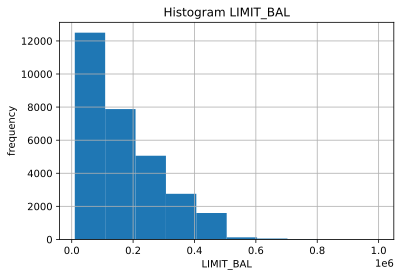

In [11]:
data['LIMIT_BAL'].hist()
plt.title("Histogram LIMIT_BAL")
plt.xlabel("LIMIT_BAL")
plt.ylabel("frequency")

In [12]:


#X = data[['log_limit_bal' ]]  #  auc = 0.63 , coeff = -0.949
#X = data[['dummy_for_sex']]  #  auc = 0.53 , coeff = 0.168
#X = data[['dummy_for_grad_school' ]]  #  auc = 0.53 , coeff = -1.17
#X = data[['dummy_for_university']] # auc =  0.53 , coeff = +
#X = data[['dummy_for_high_school' ]] # auc = 0.51 , coeff = +
#X = data[['dummy_for_married']] # auc =  0.52 , coeff =  +
#X = data[['dummy_for_single' ]] # auc =  0.52 , coeff = -
#X = data[['PAY_0' ]] # auc = 0.69 , coeff = +
#X = data[['bill_over_credit' ]] # auc = 0.57 , coeff = +
#X = data[['aver_pay_over_balance' ]] # auc = 0.61 , coeff = -






X = data[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance'   ]]  #auc = 0.72







y = data['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))

[[-0.56225125  0.08022242  0.23458866  0.68778746 -0.00287183]]
[1.28135236]
Accuracy: 0.8032
Precision: 0.6912350597609562
Recall: 0.20803357314148682
Accuracy_Score: 0.8032


c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [13]:
confusion_matrix(y_test,y_pred)
#plot_confusion_matrix(confusion_matrix(y_test,y_pred),
#                      classes= class_names, normalize = True, 
#                      title='Normalized Confusion Matrix: Logistic Regression')


array([[5677,  155],
       [1321,  347]], dtype=int64)

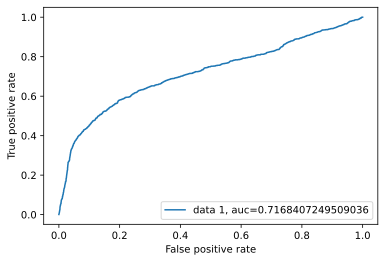

In [14]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [15]:
data1 = data[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance' , 'default payment next month'  ]] 
data1.head()

,log_limit_bal,dummy_for_sex,dummy_for_married,PAY_0,aver_pay_over_balance,default payment next month
0,4.301030,0,1,2,0.200000,1
1,5.079181,0,0,-1,0.193583,1
2,4.954243,0,0,0,0.083968,0
3,4.698970,0,1,0,0.039794,0
4,4.698970,1,1,-1,0.471997,0


In [16]:
corr = data1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,log_limit_bal,dummy_for_sex,dummy_for_married,PAY_0,aver_pay_over_balance,default payment next month
log_limit_bal,1.00,-0.07,0.11,-0.29,0.01,-0.17
dummy_for_sex,-0.07,1.00,-0.03,0.06,-0.00,0.04
dummy_for_married,0.11,-0.03,1.00,-0.02,-0.00,0.03
PAY_0,-0.29,0.06,-0.02,1.00,-0.02,0.32
aver_pay_over_balance,0.01,-0.00,-0.00,-0.02,1.00,-0.01
default payment next month,-0.17,0.04,0.03,0.32,-0.01,1.00


In [17]:

#from sklearn import svm
#y = data1['default payment next month']
#y=y.astype('int')
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
#model = svm.SVR()
#model.fit(X_train,y_train)
#y_pred = model.predict(X_test)

#from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Accuracy_Score:",accuracy_score(y_test,y_pred))

In [18]:
"""
from sklearn.ensemble import RandomForestRegressor
y = data1['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\ny = data1[\'default payment next month\']\ny=y.astype(\'int\')\nX_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)\nmodel = RandomForestRegressor()\nmodel.fit(X_train,y_train)\ny_pred = model.predict(X_test)\n\nfrom sklearn import metrics\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\nprint("Precision:",metrics.precision_score(y_test, y_pred))\nprint("Recall:",metrics.recall_score(y_test, y_pred))\nprint("Accuracy_Score:",accuracy_score(y_test,y_pred))\n'

In [19]:
confusion_matrix(y_test,y_pred)

array([[5677,  155],
       [1321,  347]], dtype=int64)

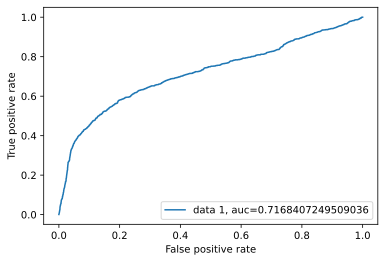

In [20]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression

Accuracy: 0.8032
Precision: 0.6912350597609562
Recall: 0.20803357314148682
Accuracy_Score: 0.8032
[[5677  155]
 [1321  347]]


c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


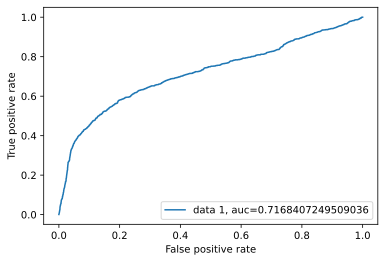

In [21]:
#import xgboost as xgb
from sklearn.linear_model import LogisticRegression

X = data1[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance'   ]]  
y = data1['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()


In [22]:
X_test[:50]

,log_limit_bal,dummy_for_sex,dummy_for_married,PAY_0,aver_pay_over_balance
10747,5.491362,1,1,0,0.055745
12573,4.000000,0,1,-1,0.373814
29676,4.698970,1,1,-1,0.609570
8856,4.903090,0,1,2,0.042472
21098,5.431364,1,0,1,0.079117
17458,5.146128,0,1,0,0.057609
1476,5.301030,1,0,-1,0.358470
5120,5.176091,1,0,-1,0.041242
18338,4.301030,0,0,0,0.125774
28279,5.361728,0,0,-2,1.001356


In [23]:
y_test[:50]

10747    0
12573    1
29676    0
8856     1
21098    0
17458    0
1476     0
5120     0
18338    0
28279    0
1684     0
20371    1
3608     0
13012    0
6793     0
5416     0
21810    1
13638    0
7526     0
17945    0
8969     0
28441    0
4984     0
16577    0
5065     0
25592    0
29621    0
21382    0
25955    0
23887    0
8535     0
23746    0
12789    0
4461     1
8103     0
6490     0
7818     0
6141     0
9120     0
9912     0
343      0
292      0
24476    0
20285    0
16997    0
11890    0
27266    0
537      0
20354    0
14119    0
Name: default payment next month, dtype: int32

In [24]:
model.predict(X_test[:50])

c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [25]:
model.predict_proba(X_test[:50])

array([[0.81630655, 0.18369345],
       [0.80564001, 0.19435999],
       [0.85009882, 0.14990118],
       [0.46639436, 0.53360564],
       [0.73197302, 0.26802698],
       [0.79861192, 0.20138808],
       [0.90951709, 0.09048291],
       [0.90348795, 0.09651205],
       [0.75717775, 0.24282225],
       [0.95737427, 0.04262573],
       [0.82846078, 0.17153922],
       [0.74211736, 0.25788264],
       [0.8615279 , 0.1384721 ],
       [0.87535099, 0.12464901],
       [0.8280224 , 0.1719776 ],
       [0.71530229, 0.28469771],
       [0.55887487, 0.44112513],
       [0.85117305, 0.14882695],
       [0.85103785, 0.14896215],
       [0.74001802, 0.25998198],
       [0.95602356, 0.04397644],
       [0.826971  , 0.173029  ],
       [0.82317389, 0.17682611],
       [0.92599392, 0.07400608],
       [0.68511012, 0.31488988],
       [0.83316115, 0.16683885],
       [0.69485634, 0.30514366],
       [0.89702584, 0.10297416],
       [0.80136009, 0.19863991],
       [0.76146673, 0.23853327],
       [0.

# XGBoost

[22:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.818
Precision: 0.6896120150187734
Recall: 0.3303357314148681
Accuracy_Score: 0.818
[[5584  248]
 [1117  551]]


c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


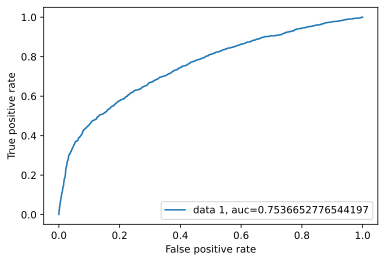

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn.linear_model import LogisticRegression

X = data1[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance'   ]]  
y = data1['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = XGBClassifier()
#model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
#print("Score:",model.score(X_test, y_test))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()


In [27]:
X_test[:50]

,log_limit_bal,dummy_for_sex,dummy_for_married,PAY_0,aver_pay_over_balance
10747,5.491362,1,1,0,0.055745
12573,4.000000,0,1,-1,0.373814
29676,4.698970,1,1,-1,0.609570
8856,4.903090,0,1,2,0.042472
21098,5.431364,1,0,1,0.079117
17458,5.146128,0,1,0,0.057609
1476,5.301030,1,0,-1,0.358470
5120,5.176091,1,0,-1,0.041242
18338,4.301030,0,0,0,0.125774
28279,5.361728,0,0,-2,1.001356


In [28]:
y_test[:50]

10747    0
12573    1
29676    0
8856     1
21098    0
17458    0
1476     0
5120     0
18338    0
28279    0
1684     0
20371    1
3608     0
13012    0
6793     0
5416     0
21810    1
13638    0
7526     0
17945    0
8969     0
28441    0
4984     0
16577    0
5065     0
25592    0
29621    0
21382    0
25955    0
23887    0
8535     0
23746    0
12789    0
4461     1
8103     0
6490     0
7818     0
6141     0
9120     0
9912     0
343      0
292      0
24476    0
20285    0
16997    0
11890    0
27266    0
537      0
20354    0
14119    0
Name: default payment next month, dtype: int32

In [29]:
model.predict(X_test[:50])

c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [30]:
model.predict_proba(X_test[:50])

array([[0.95270705, 0.04729293],
       [0.75113124, 0.24886878],
       [0.76689297, 0.23310705],
       [0.19540703, 0.80459297],
       [0.8100688 , 0.1899312 ],
       [0.8669394 , 0.13306056],
       [0.84350055, 0.15649945],
       [0.82954323, 0.17045674],
       [0.82334983, 0.1766502 ],
       [0.91891   , 0.08108997],
       [0.93039143, 0.06960857],
       [0.862802  , 0.13719794],
       [0.98155445, 0.01844558],
       [0.7155288 , 0.2844712 ],
       [0.9147379 , 0.08526213],
       [0.7494519 , 0.25054812],
       [0.36520314, 0.63479686],
       [0.93629074, 0.06370929],
       [0.9556059 , 0.04439405],
       [0.76246387, 0.23753612],
       [0.8851625 , 0.11483753],
       [0.9325654 , 0.0674346 ],
       [0.9221536 , 0.07784639],
       [0.82996917, 0.17003082],
       [0.7847291 , 0.2152709 ],
       [0.92833304, 0.07166693],
       [0.79100215, 0.20899788],
       [0.59548855, 0.40451148],
       [0.9328101 , 0.06718987],
       [0.71713877, 0.28286126],
       [0.

# Naive Bayes

Accuracy: 0.22626666666666667
Precision: 0.2225204670514025
Recall: 0.9940047961630696
Accuracy_Score: 0.22626666666666667
[[  39 5793]
 [  10 1658]]


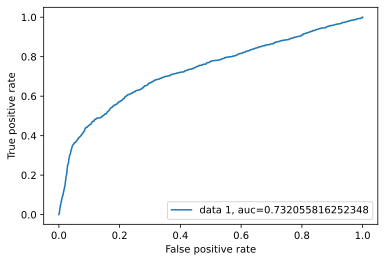

In [31]:
from sklearn.naive_bayes import GaussianNB

X = data1[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance'   ]]  
y = data1['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = GaussianNB()
#model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
#print("Score:",model.score(X_test, y_test))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()


# Random Forest

c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias 

Accuracy: 0.7745333333333333
Precision: 0.49004329004329006
Recall: 0.3393285371702638
Accuracy_Score: 0.7745333333333333
[[5243  589]
 [1102  566]]


c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the

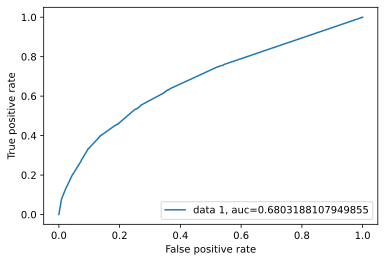

In [32]:
from sklearn.ensemble import RandomForestClassifier

X = data1[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance'   ]]  
y = data1['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = RandomForestClassifier()
#model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
#print("Score:",model.score(X_test, y_test))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()


# KNN

c:\users\gabri\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\base.py:781: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


Accuracy: 0.8181333333333334
Precision: 0.6904761904761905
Recall: 0.3303357314148681
Accuracy_Score: 0.8181333333333334
[[5585  247]
 [1117  551]]


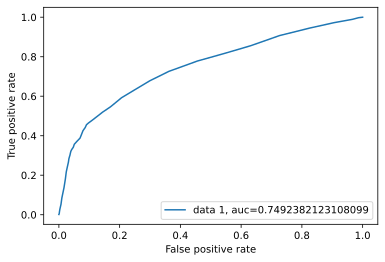

In [33]:
from sklearn.neighbors import KNeighborsClassifier

X = data1[['log_limit_bal','dummy_for_sex' ,   \
   'dummy_for_married',  'PAY_0', 'aver_pay_over_balance'   ]]  
y = data1['default payment next month']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 1)
model = KNeighborsClassifier(n_neighbors = 50)
#model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy_Score:",accuracy_score(y_test,y_pred))
#print("Score:",model.score(X_test, y_test))

print(confusion_matrix(y_test,y_pred))


from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + repr(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()